In [1]:
import autograd.numpy as ag_np
import matplotlib.pyplot as plt
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

from CollabFilterMeanOnly import CollabFilterMeanOnly

In [2]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

In [3]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model1 = CollabFilterMeanOnly(
    n_epochs=200, batch_size=10000, step_size=0.9)
model1.init_parameter_dict(n_users, n_items, train_tuple)

In [4]:
# Fit the model with SGD
model1.fit(train_tuple, valid_tuple)

(0.8, 2.3)

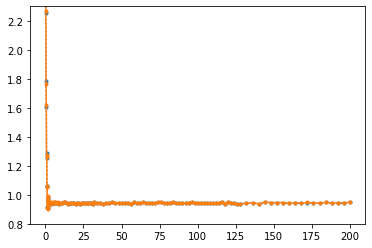

In [5]:
plt.plot(model1.trace_epoch, model1.trace_mae_train, '.:')
plt.plot(model1.trace_epoch, model1.trace_mae_valid, '.-')
plt.ylim(0.8, 2.3)

In [6]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model2 = CollabFilterMeanOnly(
    n_epochs=200, batch_size=100, step_size=0.9)
model2.init_parameter_dict(n_users, n_items, train_tuple)

In [7]:
# Fit the model with SGD
model2.fit(train_tuple, valid_tuple)

(0.8, 2.3)

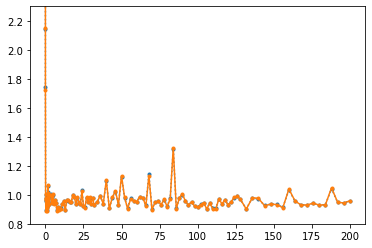

In [8]:
plt.plot(model2.trace_epoch, model2.trace_mae_train, '.:')
plt.plot(model2.trace_epoch, model2.trace_mae_valid, '.-')
plt.ylim(0.8, 2.3)

(0.85, 1.1)

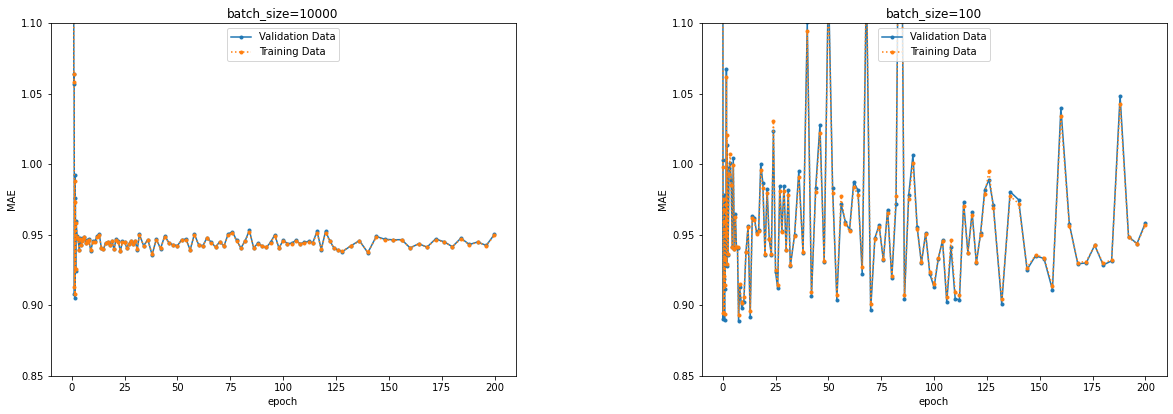

In [9]:
n_rows = 1
n_cols = 2
f, axs = plt.subplots(1,2,figsize=(10*n_cols,5*n_rows))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)

plt.subplot(n_rows,n_cols,1)
plt.plot(model1.trace_epoch, model1.trace_mae_valid, '.-')
plt.plot(model1.trace_epoch, model1.trace_mae_train, '.:')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend(["Validation Data", "Training Data"], loc=9)
plt.title("batch_size=10000")
plt.ylim(0.85,1.1)
  
plt.subplot(n_rows,n_cols,2)
plt.plot(model2.trace_epoch, model2.trace_mae_valid, '.-')
plt.plot(model2.trace_epoch, model2.trace_mae_train, '.:')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend(["Validation Data", "Training Data"], loc=9)
plt.title("batch_size=100")
plt.ylim(0.85,1.1)

In [10]:
ag_np.mean(train_tuple[2])

3.5305857142857144

In [11]:
print(model1.param_dict['mu'])

[3.57494639]


In [12]:
print(min(model1.trace_mae_valid))
print(ag_np.argmin(model1.trace_mae_valid))

0.905181575199758
11


In [17]:
model3 = CollabFilterMeanOnly(
    n_epochs=11, batch_size=10000, step_size=0.9)
model3.init_parameter_dict(n_users, n_items, train_tuple)
# Fit the model with SGD
model3.fit(train_tuple, valid_tuple)

In [19]:
yhat_te_L = model3.predict(test_tuple[0], test_tuple[1], model3.param_dict['mu'])
MAE = ag_np.mean(ag_np.absolute(yhat_te_L - test_tuple[2]))
print(MAE)

0.9461572283159154
